<a href="https://colab.research.google.com/github/jmbaek/DNABERT/blob/master/DNABERT_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intall requirements

In [1]:
!git clone https://github.com/jmbaek/DNABERT.git

from google.colab import drive
drive.mount('/content/gdrive')
# model files are at /content/gdrive/MyDrive/DNABERT/6-new-12w-0

%cd /content/DNABERT
!python -m pip install --editable .
!python3 -m pip install -r requirements.txt

Cloning into 'DNABERT'...
remote: Enumerating objects: 428, done.
remote: Counting objects: 100% (428/428), done.
remote: Compressing objects: 100% (408/408), done.
remote: Total 428 (delta 138), reused 16 (delta 4), pack-reused 0
Receiving objects: 100% (428/428), 8.92 MiB | 2.42 MiB/s, done.
Resolving deltas: 100% (138/138), done.
Mounted at /content/gdrive
/content/DNABERT
Obtaining file:///content/DNABERT
     |████████████████████████████████| 5.7 MB 3.4 MB/s 
     |████████████████████████████████| 132 kB 51.3 MB/s 
     |████████████████████████████████| 1.2 MB 65.4 MB/s 
     |████████████████████████████████| 895 kB 60.7 MB/s 
     |████████████████████████████████| 79 kB 11.0 MB/s 
     |████████████████████████████████| 8.7 MB 77.9 MB/s 
     |████████████████████████████████| 138 kB 80.0 MB/s 
     |████████████████████████████████| 127 kB 95.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Succes

## Model archetecture

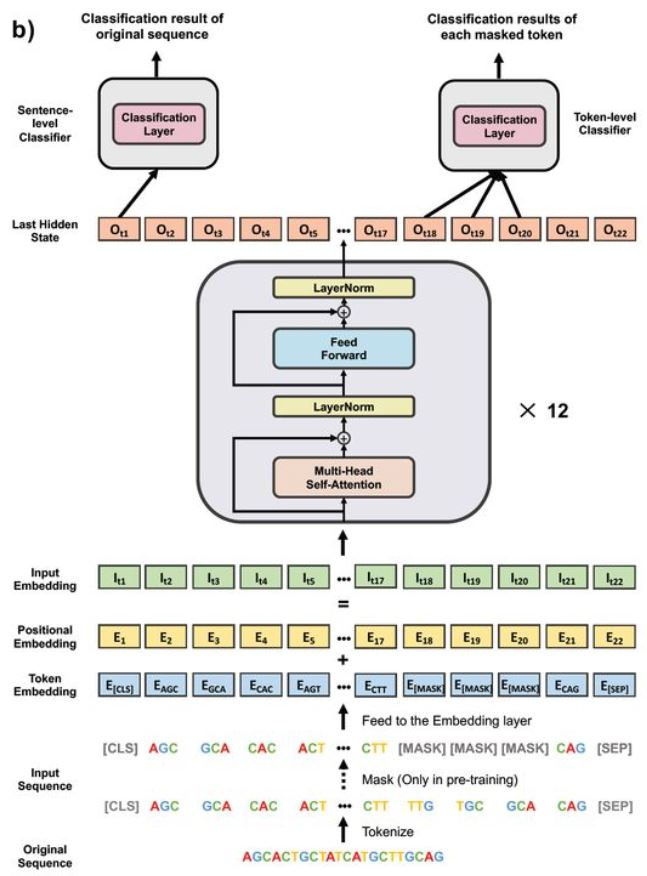

In [ ]:
from google.colab.patches import cv2, cv2_imshow
import numpy as np

img1 = cv2.imread('/content/gdrive/MyDrive/DNABERT/DNABERT.JPG')
cv2_imshow(img1)

## Attention mechanism

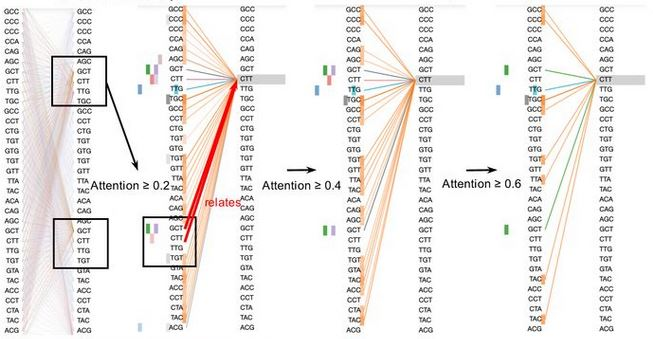

In [ ]:
img2 = cv2.imread('/content/gdrive/MyDrive/DNABERT/Attention.JPG')
cv2_imshow(img2)

## New data prep for pretrain and finetuning

In [4]:
import os
import pandas as pd
import numpy as np

def kmer2seq(kmers):
    """
    Convert kmers to original sequence
    
    Arguments:
    kmers -- str, kmers separated by space.
    
    Returns:
    seq -- str, original sequence.
    """
    kmers_list = kmers.split(" ")
    bases = [kmer[0] for kmer in kmers_list[0:-1]]
    bases.append(kmers_list[-1])
    seq = "".join(bases)
    assert len(seq) == len(kmers_list) + len(kmers_list[0]) - 1
    return seq

def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space
    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers


In [ ]:
from sklearn.model_selection import train_test_split

seq = open('/content/gdrive/MyDrive/DNABERT/TAIR10.1_genomic.txt1','r')
seq1 = seq.read()
seq6 = seq2kmer(seq1, 6)
with open('/content/DNABERT/examples/sample_data/At6.txt', 'w') as f:
  f.write(seq6)

seq_list = seq6.split()

train, test = train_test_split(seq_list,
                               test_size=0.1, 
                               train_size=0.9,
                               random_state=None,
                               shuffle=True, 
                               stratify=None)

train_str = ' '.join(train)
test_str = ' '.join(test)
with open('/content/DNABERT/examples/sample_data/traint.txt', 'w') as f:
  f.write(train_str)
with open('/content/DNABERT/examples/sample_data/test.txt', 'w') as f:
  f.write(test_str)

## Pretraining

In [32]:
!python /content/DNABERT/examples/run_pretrain.py \
    --output_dir /content/DNABERT/examples/sample_data \
    --model_type=dna \
    --tokenizer_name=dna6 \
    --config_name=/content/DNABERT/src/transformers/dnabert-config/bert-config-6/config.json \
    --do_train \
    --train_data_file=/content/DNABERT/examples/sample_data/At6.txt \
    --do_eval \
    --eval_data_file=/content/DNABERT/examples/sample_data/test.txt \
    --mlm \
    --gradient_accumulation_steps 25 \
    --per_gpu_train_batch_size 10 \
    --per_gpu_eval_batch_size 6 \
    --save_steps 500 \
    --save_total_limit 20 \
    --max_steps 200000 \
    --evaluate_during_training \
    --logging_steps 500 \
    --line_by_line \
    --learning_rate 4e-4 \
    --block_size 512 \
    --adam_epsilon 1e-6 \
    --weight_decay 0.01 \
    --beta1 0.9 \
    --beta2 0.98 \
    --mlm_probability 0.025 \
    --warmup_steps 10000 \
    --overwrite_output_dir \
    --n_process 24

04/09/2022 18:36:08 - WARNING - __main__ -   Process rank: -1, device: cuda:0, n_gpu: 1, distributed training: False, 16-bits training: False
04/09/2022 18:36:08 - INFO - transformers.configuration_utils -   loading configuration file /content/DNABERT/src/transformers/dnabert-config/bert-config-6/config.json
04/09/2022 18:36:08 - INFO - transformers.configuration_utils -   Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "do_sample": false,
  "eos_token_ids": 0,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_eps": 1e-12,
  "length_penalty": 1.0,
  "max_length": 20,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention

## Finetuning

In [ ]:
!mkdir -p finetuned/6

!python /content/DNABERT/examples/run_finetune.py \
    --model_type dna \
    --tokenizer_name=dna6 \
    --model_name_or_path '/content/gdrive/MyDrive/DNABERT/6-new-12w-0' \
    --task_name dnaprom \
    --do_train \
    --do_eval \
    --data_dir /content/DNABERT/examples/sample_data/ft/6 \
    --max_seq_length 100 \
    --per_gpu_eval_batch_size=32   \
    --per_gpu_train_batch_size=32   \
    --learning_rate 2e-4 \
    --num_train_epochs 5.0 \
    --output_dir /content/DNABERT/finetuned/6 \
    --evaluate_during_training \
    --logging_steps 100 \
    --save_steps 4000 \
    --warmup_percent 0.1 \
    --hidden_dropout_prob 0.1 \
    --overwrite_output \
    --weight_decay 0.01 \
    --n_process 8

Streaming output truncated to the last 5000 lines.
Iteration:  32% 322/1012 [03:54<07:34,  1.52it/s]
Iteration:  32% 323/1012 [03:55<07:33,  1.52it/s]
Iteration:  32% 324/1012 [03:55<07:33,  1.52it/s]
Iteration:  32% 325/1012 [03:56<07:33,  1.52it/s]
Iteration:  32% 326/1012 [03:57<07:32,  1.52it/s]
Iteration:  32% 327/1012 [03:57<07:32,  1.52it/s]
Iteration:  32% 328/1012 [03:58<07:31,  1.52it/s]
Iteration:  33% 329/1012 [03:59<07:31,  1.51it/s]
Iteration:  33% 330/1012 [03:59<07:30,  1.51it/s]
Iteration:  33% 331/1012 [04:00<07:28,  1.52it/s]
Iteration:  33% 332/1012 [04:00<07:28,  1.52it/s]
Iteration:  33% 333/1012 [04:01<07:27,  1.52it/s]
Iteration:  33% 334/1012 [04:02<07:26,  1.52it/s]
Iteration:  33% 335/1012 [04:02<07:26,  1.52it/s]
Iteration:  33% 336/1012 [04:03<07:25,  1.52it/s]
Iteration:  33% 337/1012 [04:04<07:25,  1.52it/s]
Iteration:  33% 338/1012 [04:04<07:23,  1.52it/s]
Iteration:  33% 339/1012 [04:05<07:23,  1.52it/s]
Iteration:  34% 340/1012 [04:06<07:22,  1.52it/s]

In [ ]:
!cp -R /content/DNABERT/finetuned/6 '/content/gdrive/MyDrive/DNABERT/finetuned6'

## Prediction

In [ ]:
!mkdir -p prediction/6

!python /content/DNABERT/examples/run_finetune.py \
    --model_type dna \
    --tokenizer_name=dna6 \
    --model_name_or_path /content/DNABERT/finetuned/6 \
    --task_name dnaprom \
    --do_predict \
    --data_dir /content/DNABERT/examples/sample_data/ft/6  \
    --max_seq_length 75 \
    --per_gpu_pred_batch_size=128   \
    --output_dir /content/DNABERT/finetuned/6 \
    --predict_dir /content/DNABERT/prediction/6 \
    --n_process 48

04/06/2022 12:40:56 - WARNING - __main__ -   Process rank: -1, device: cuda, n_gpu: 1, distributed training: False, 16-bits training: False
04/06/2022 12:40:56 - INFO - transformers.configuration_utils -   loading configuration file /content/DNABERT/finetuned/6/config.json
04/06/2022 12:40:56 - INFO - transformers.configuration_utils -   Model config BertConfig {
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "do_sample": false,
  "eos_token_ids": 0,
  "finetuning_task": "dnaprom",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_eps": 1e-12,
  "length_penalty": 1.0,
  "max_length": 20,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "n

In [ ]:
!cp -R /content/DNABERT/prediction/6 '/content/gdrive/MyDrive/DNABERT/prediction6'

In [ ]:
!cp -R /content/DNABERT/prediction/6 '/content/gdrive/MyDrive/DNABERT/prediction6'

## Visualize results

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
y_truth1 = pd.read_csv('/content/DNABERT/examples/sample_data/ft/6/dev.tsv', sep='\t')['label']
y_truth = y_truth1.to_list()

y_predicted = np.load('/content/gdrive/MyDrive/DNABERT/prediction6/6/pred_results.npy')
y_predicted = np.where(y_predicted > 0.5, 1, 0)

Text(33.0, 0.5, 'Truth')

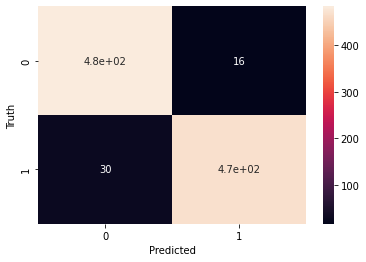

In [ ]:
cm = confusion_matrix(y_truth, y_predicted)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_truth, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       500
           1       0.97      0.94      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



# Motif analysis

In [ ]:
!pip install Bio
!pip install pyahocorasick

     |████████████████████████████████| 106 kB 14.2 MB/s 


In [ ]:
!python /content/DNABERT/motif/find_motifs.py \
                    --data_dir /content/DNABERT/examples/sample_data/ft/6 \
                    --predict_dir /content/gdrive/MyDrive/DNABERT/prediction6/6 \
                    --save_file_dir /content/DNABERT/examples/sample_data \
                    --window_size 40 \
                    --min_len 5 \
                    --pval_cutoff .005

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


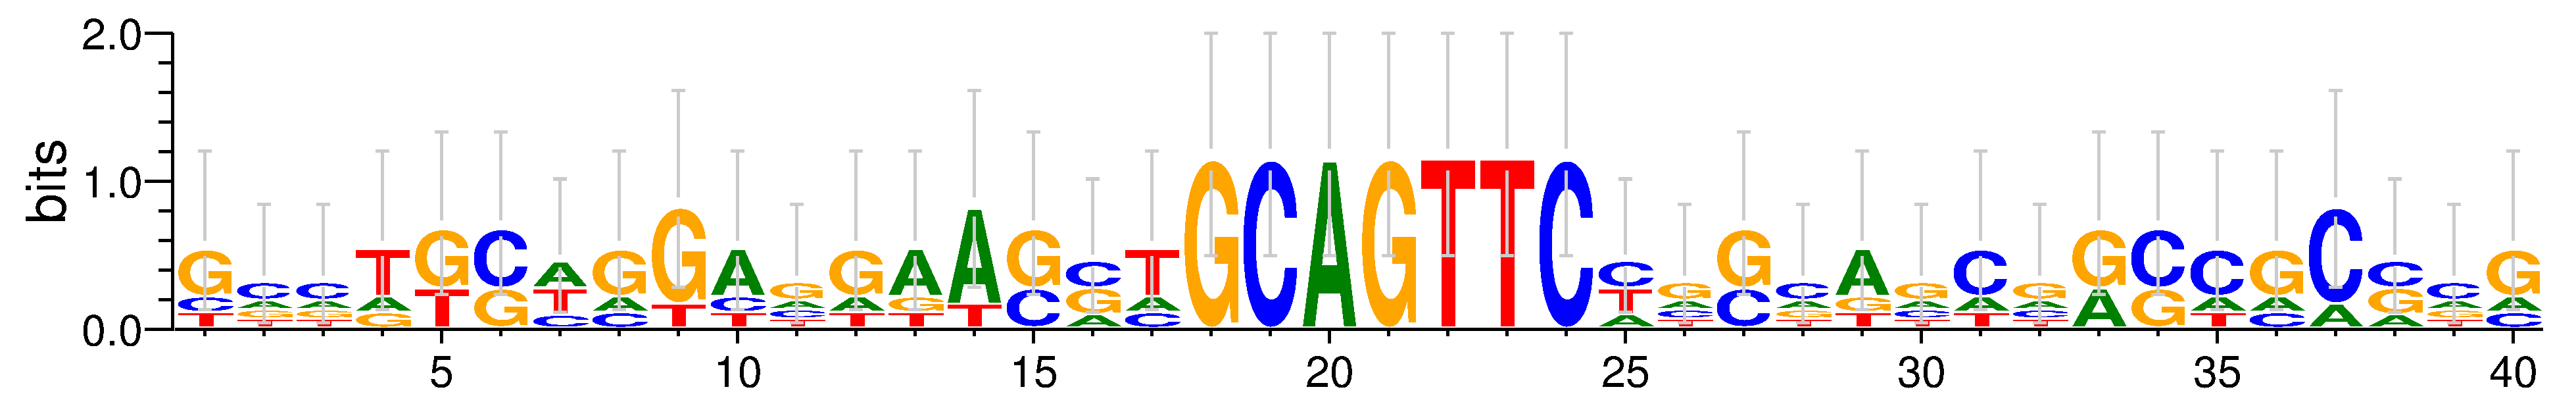

In [ ]:
from google.colab.patches import cv2, cv2_imshow
img1 = cv2.imread('/content/DNABERT/examples/sample_data/motif_GCAGTT_5_weblogo.png')
cv2_imshow(img1)

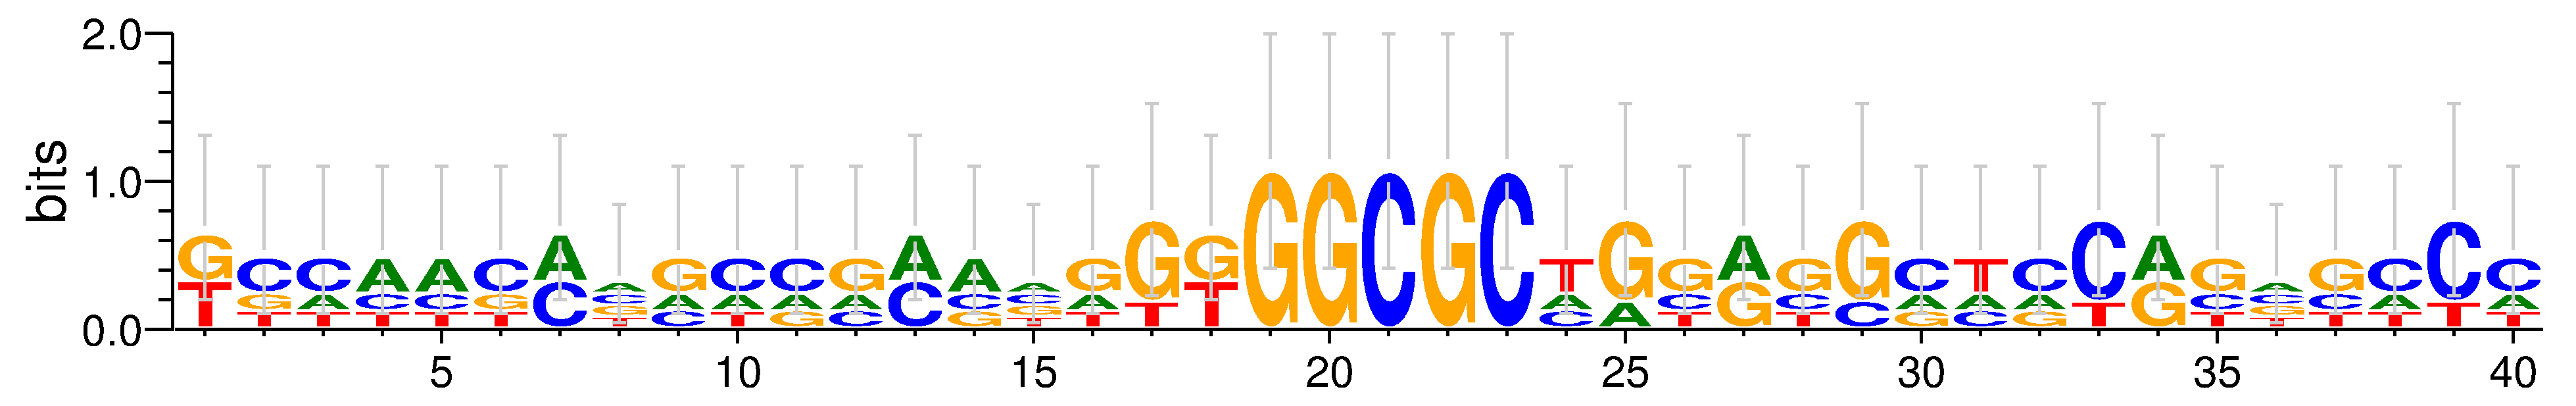

In [ ]:
img2 = cv2.imread('/content/DNABERT/examples/sample_data/motif_GGGCGC_4_weblogo.png')
cv2_imshow(img2)